# Exemplo de separação regional residual utilizando um ajuste polinomial simples

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere
from fatiando.vis import mpl

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import matplotlib.pyplot as plt

### Pontos onde são calculados os dados

In [3]:
shape = (100, 100) # número de pontos ao longo de x e y
N = shape[0]*shape[1] # número de pontos
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

xc = 0.5*(area[1] + area[0]) # coordenadas x do centro da área
yc = 0.5*(area[3] + area[2]) # coordenadas y do centro da área

### Campo geomagnético local

In [4]:
inc = -30. # graus
dec = 0. # graus

In [5]:
c0 = 23500.0
c1 = 0.05
c2 = 0.08
amp = c0 + c1*(xp - xc) + c2*(yp - yc) # nT

In [6]:
F = utils.ang2vec(1.0, inc, dec) # versor do campo geomagnético local

In [7]:
print F

[ 0.8660254  0.        -0.5      ]


### Modelo de corpo esférico

In [8]:
model = [mesher.Sphere(0., 0., 700., 500., {'magnetization': utils.ang2vec(10., inc, dec)})]

### Anomalia de campo total (em nT)

In [9]:
bx = sphere.bx(xp, yp, zp, model)
by = sphere.by(xp, yp, zp, model)
bz = sphere.bz(xp, yp, zp, model)

In [10]:
act_aprox = sphere.tf(xp, yp, zp, model, inc, dec)

In [11]:
ct = np.sqrt((amp*F[0] + bx)**2 + (amp*F[1] + by)**2 + (amp*F[2] + bz)**2)

In [12]:
act = ct - amp

### Plot da anomalia de campo total

/home/vanderlei/anaconda3/envs/fatiando2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


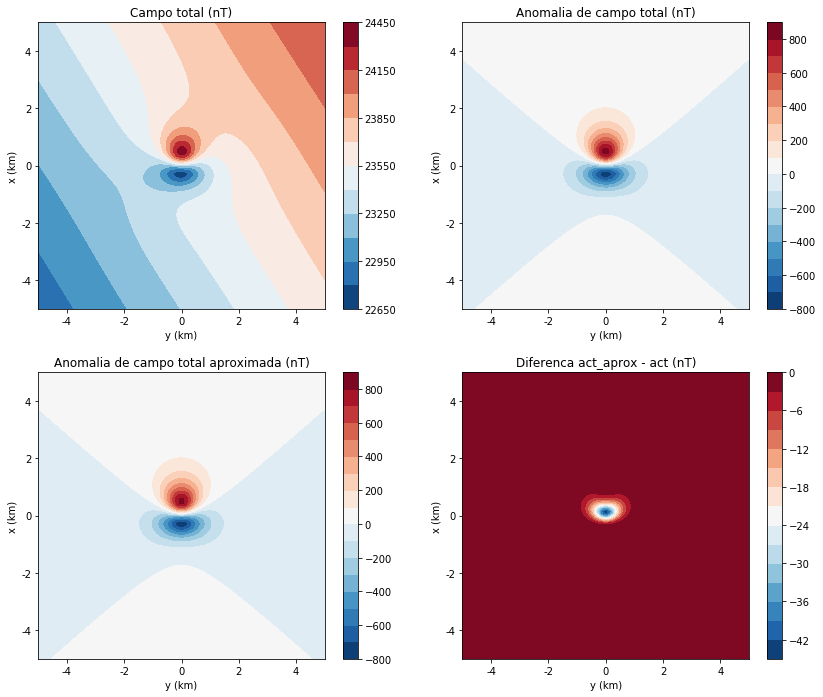

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Campo total (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, ct, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Anomalia de campo total (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Anomalia de campo total aproximada (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, act_aprox, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("Diferenca act_aprox - act (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, act_aprox - act, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Ajuste polinomial simples

In [14]:
A = np.vstack((np.ones(N), xp, yp)).T

In [15]:
p = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,ct))

In [16]:
print '           c            p'
print '%12.5f %12.5f' % (c0,p[0])
print '%12.5f %12.5f' % (c1,p[1])
print '%12.5f %12.5f' % (c2,p[2])

           c            p
 23500.00000  23499.56171
     0.05000      0.05260
     0.08000      0.08000


In [17]:
ct_regional = np.dot(A,p)

In [18]:
ct_residual = ct - ct_regional

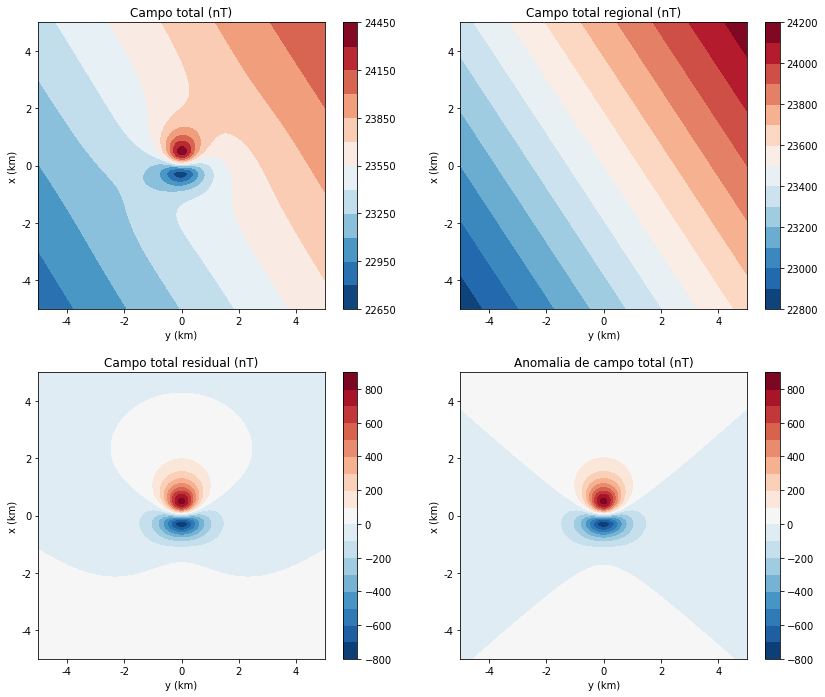

In [19]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Campo total (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, ct, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Campo total regional (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, ct_regional, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Campo total residual (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, ct_residual, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("Anomalia de campo total (nT)")
plt.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()